In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel, VarianceThreshold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Use Dog_1.csv as an example
data = np.genfromtxt("../../files/SeizurePrediction/Dog_1.csv", delimiter=",")
# View the shape of the data
print("Number of Observation(raw): {}\nNumber of features(raw): {}".format(data.shape[0], data.shape[1]-2))
# Peek the sub data to make sure that the import succed
print(data[0:5, 0:5])

Number of Observation(raw): 8064
Number of features(raw): 449
[[ 0.          1.         -0.111257    0.5060765  -1.780112  ]
 [ 0.          1.         -0.1037118   0.5001315  -1.659389  ]
 [ 0.          1.         -0.1007022   0.4940033  -1.611235  ]
 [ 0.          1.         -0.09124166  0.4639486  -1.459867  ]
 [ 0.          1.         -0.1056772   0.4936875  -1.690836  ]]


In [4]:
# We need to concatenate the features every 3 rows
# First separate the features and labels
X_data_raw = data[:, 2:-1]
y_data_raw = data[:, 0]
# Reshape
X_data = np.reshape(X_data_raw, (int(X_data_raw.shape[0]/3), -1))
y_data = y_data_raw[[i for i in range(0, y_data_raw.shape[0], 3)]]
# Shape
print("Number of Observation(Concat): {}\nNumber of features(Concat): {}".format(X_data.shape[0], X_data.shape[1]))
print("\nLength of the Label(Concat): {}".format(y_data.shape[0]))

Number of Observation(Concat): 2688
Number of features(Concat): 1344

Length of the Label(Concat): 2688


In [5]:
# Now for feature selection
# Find of the best regularization degree
parameters = {"C": np.logspace(-2, 1, num=20)}
lsvc_op = LinearSVC(penalty="l1", dual=False)
clf = GridSearchCV(lsvc_op, parameters, verbose=2)
clf.fit(X_data, y_data)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .............................................C=0.01; total time=   0.3s
[CV] END .............................................C=0.01; total time=   0.3s
[CV] END .............................................C=0.01; total time=   0.3s
[CV] END .............................................C=0.01; total time=   0.3s
[CV] END .............................................C=0.01; total time=   0.3s
[CV] END ..............................C=0.01438449888287663; total time=   0.3s
[CV] END ..............................C=0.01438449888287663; total time=   0.3s
[CV] END ..............................C=0.01438449888287663; total time=   0.3s
[CV] END ..............................C=0.01438449888287663; total time=   0.3s
[CV] END ..............................C=0.01438449888287663; total time=   0.3s
[CV] END ...............................C=0.0206913808111479; total time=   0.4s
[CV] END ...............................C=0.020

GridSearchCV(estimator=LinearSVC(dual=False, penalty='l1'),
             param_grid={'C': array([ 0.01      ,  0.0143845 ,  0.02069138,  0.02976351,  0.04281332,
        0.06158482,  0.08858668,  0.1274275 ,  0.18329807,  0.26366509,
        0.37926902,  0.54555948,  0.78475997,  1.12883789,  1.62377674,
        2.33572147,  3.35981829,  4.83293024,  6.95192796, 10.        ])},
             verbose=2)

In [6]:
# Get the best parameter
best_c = clf.best_params_
lsvc_fs = LinearSVC(C=best_c["C"], penalty="l1", dual=False, random_state=2021).fit(X_data, y_data)
# Select from model
model = SelectFromModel(lsvc_fs, prefit=True)
X_data_reduced = model.transform(X_data)
# Print the new shape
print("Number of Observation: {}\nNumber of features(Reduced): {}\
   ".format(X_data_reduced.shape[0], X_data_reduced.shape[1]))

Number of Observation: 2688
Number of features(Reduced): 73   


In [11]:
np.where(model.get_support())

(array([   6,    8,   31,   32,   33,   68,   79,   80,   81,   93,   94,
         104,  116,  127,  129,  140,  152,  166,  176,  188,  224,  228,
         229,  454,  456,  468,  480,  481,  492,  506,  516,  528,  540,
         552,  564,  575,  576,  577,  588,  599,  612,  624,  673,  677,
         902,  903,  904,  906,  916,  929,  940,  964,  966,  976,  978,
        1000, 1002, 1012, 1023, 1024, 1025, 1026, 1036, 1047, 1049, 1050,
        1060, 1072, 1074, 1086, 1120, 1124, 1125], dtype=int64),)

In [100]:
# If need further feature selection
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_data_further = sel.fit_transform(X_data_reduced)
print("Number of Observation: {}\nNumber of features(Furter Reduced): {}\
   ".format(X_data_further.shape[0], X_data_further.shape[1]))

Number of Observation: 2688
Number of features(Furter Reduced): 65   


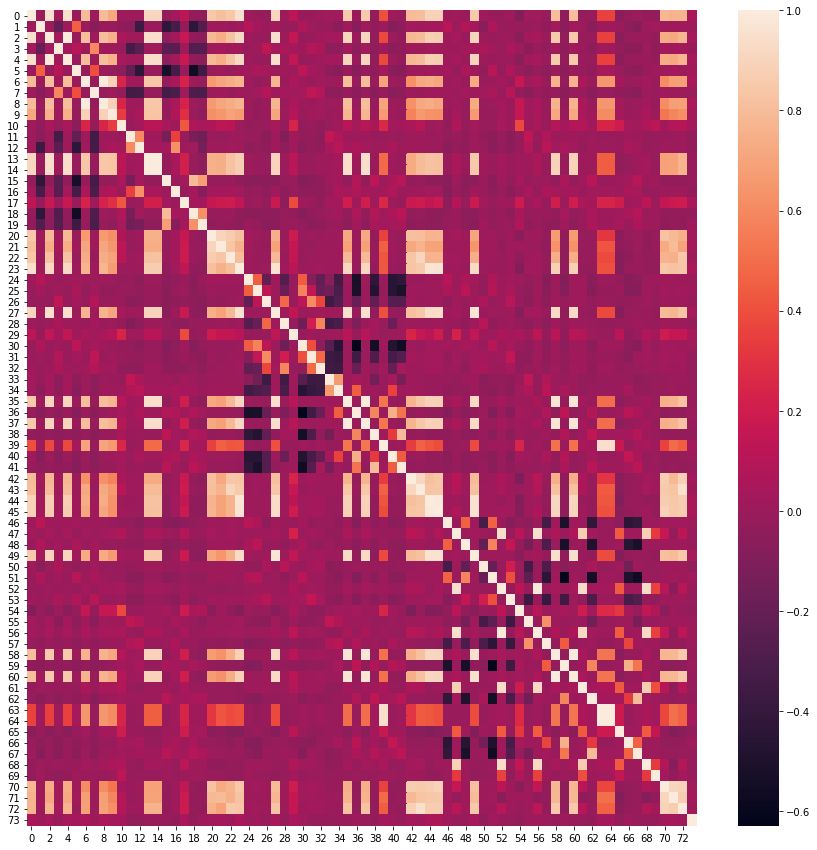

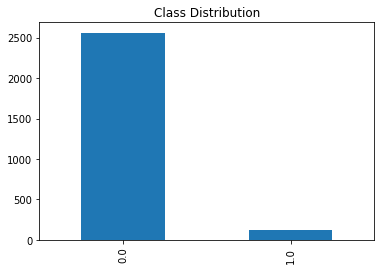

In [119]:
# Plot something
# Covariance matrix
df = pd.DataFrame(np.concatenate((X_data_reduced,
          np.reshape(y_data, (-1, 1))), axis=1))
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr())
plt.show()

df_y = pd.Series(y_data).value_counts().plot.bar()
plt.title("Class Distribution")
plt.show()

In [61]:
447//16

27

In [72]:
def get_fname(x,nc=16):
    nf = 28*nc+1
    window = ((x//nf)+1)*80
    timeinw = x%nf
    time = timeinw//nc
    idx = (timeinw%nc) + 1
    entries = ["T_corrs_mean", "T_corrs_std", "T_corrs_sum", "T_corrs_abs_sum", "T_corrs_D", "T_mean", "T_abs_mean", "T_std", "T_sum", "T_rms", "T_kurtosis", "T_skewness"]
    entries += ["f_corr_mean", "f_corr_std", "f_corr_sum", "f_corr_eig"]
    entries += ["f_max_bands(band_{})".format(t+1) for t in range(11)]
    entries += ["f_max_bands", "f_max_bands_avg"]
    entry = entries[time.astype(int)]
    return("{}_{}_{}".format(entry,idx,window))

        

In [73]:
feature_names = np.where(model.get_support())[0]
names = [get_fname(i) for i in feature_names]
names

['T_corrs_mean_7_80',
 'T_corrs_mean_9_80',
 'T_corrs_std_16_80',
 'T_corrs_sum_1_80',
 'T_corrs_sum_2_80',
 'T_corrs_D_5_80',
 'T_corrs_D_16_80',
 'T_mean_1_80',
 'T_mean_2_80',
 'T_mean_14_80',
 'T_mean_15_80',
 'T_abs_mean_9_80',
 'T_std_5_80',
 'T_std_16_80',
 'T_sum_2_80',
 'T_sum_13_80',
 'T_rms_9_80',
 'T_kurtosis_7_80',
 'T_skewness_1_80',
 'T_skewness_13_80',
 'f_corr_sum_1_80',
 'f_corr_sum_5_80',
 'f_corr_sum_6_80',
 'T_corrs_mean_6_160',
 'T_corrs_mean_8_160',
 'T_corrs_std_4_160',
 'T_corrs_std_16_160',
 'T_corrs_sum_1_160',
 'T_corrs_sum_12_160',
 'T_corrs_abs_sum_10_160',
 'T_corrs_D_4_160',
 'T_corrs_D_16_160',
 'T_mean_12_160',
 'T_abs_mean_8_160',
 'T_std_4_160',
 'T_std_15_160',
 'T_std_16_160',
 'T_sum_1_160',
 'T_sum_12_160',
 'T_rms_7_160',
 'T_kurtosis_4_160',
 'T_kurtosis_16_160',
 'f_corr_sum_1_160',
 'f_corr_sum_5_160',
 'T_corrs_mean_5_240',
 'T_corrs_mean_6_240',
 'T_corrs_mean_7_240',
 'T_corrs_mean_9_240',
 'T_corrs_std_3_240',
 'T_corrs_std_16_240',
 'T_c

In [48]:
np.where(model.get_support())[0]

array([   6,    8,   31,   32,   33,   68,   79,   80,   81,   93,   94,
        104,  116,  127,  129,  140,  152,  166,  176,  188,  224,  228,
        229,  454,  456,  468,  480,  481,  492,  506,  516,  528,  540,
        552,  564,  575,  576,  577,  588,  599,  612,  624,  673,  677,
        902,  903,  904,  906,  916,  929,  940,  964,  966,  976,  978,
       1000, 1002, 1012, 1023, 1024, 1025, 1026, 1036, 1047, 1049, 1050,
       1060, 1072, 1074, 1086, 1120, 1124, 1125], dtype=int64)

In [69]:
1125//16

70

In [54]:
entries = ["T_corrs_mean", "T_corrs_std", "T_corrs_sum", "T_corrs_abs_sum", "T_corrs_D", "T_mean", "T_abs_mean", "T_std", "T_sum", "T_rms", "T_kurtosis", "T_skewness"]
entries += ["f_corr_mean", "f_corr_std", "f_corr_sum", "f_corr_eig"]
entries += ["f_max_bands(band_{})".format(t+1) for t in range(11)]
entries.append("f_max_bands_avg")
len(entries)

28